# End-to-End Machine Learning Project
## Lesson 2.7 — Model Comparison & Error Analysis

This notebook compares multiple models using consistent evaluation
and performs error analysis to understand model behavior.

The goal is not only to improve performance, but to understand
*why* models succeed or fail.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
housing = fetch_california_housing(as_frame=True)

housing_df = housing.data
housing_df['target'] = housing.target

housing_df['income_cat'] = pd.cut(
    housing_df['MedInc'],
    bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing_df, housing_df['income_cat']):
    train_set = housing_df.loc[train_idx].drop("income_cat", axis=1)

In [30]:
X_train = train_set.drop("target", axis=1)
y_train = train_set["target"].copy()

In [31]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [32]:
lin_reg_model = Pipeline([
    ("preprocessing", num_pipeline),
    ("lin_reg", LinearRegression())
])

In [33]:
lin_scores = cross_val_score(
    lin_reg_model,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=5
)

lin_rsme = -lin_scores.mean()
lin_rsme

np.float64(0.7311763452286281)

In [34]:
rf_model = Pipeline([
    ("preprocessing", num_pipeline),
    ("model", RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])


In [35]:
rf_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=5
)

rf_rmse = -rf_scores.mean()
rf_rmse


np.float64(0.5135254509480542)

In [36]:
lin_reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or

In [37]:
lin_preds = lin_reg_model.predict(X_train)
rf_preds = rf_model.predict(X_train)

lin_errors = lin_preds - y_train
rf_errors = rf_preds - y_train


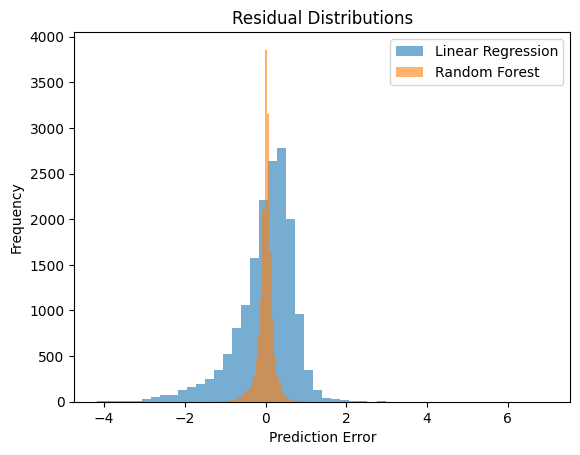

In [38]:
plt.hist(lin_errors, bins=50, alpha=0.6, label="Linear Regression")
plt.hist(rf_errors, bins=50, alpha=0.6, label="Random Forest")
plt.legend()
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Residual Distributions")
plt.show()
